<a href="https://colab.research.google.com/github/shryu8902/KIRD_AUTOML/blob/main/KIRD_Day_2_3_%08AutoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 오토케라스

autokeras는 keras 기반 오토ML 라이브러리로 딥러닝 모델 개발에 대한 오토ML 기능들을 제공합니다.

- Bayesian optimization 기반 NAS 수행
- 다양한 태스크에 대한 간단한 인터페이스 제공
- Image Classification/Regression
- Text Classification/Regression
- Structured Data Classification/Regression --> V2.0이후로 삭제

In [ ]:
!pip install tensorflow==2.15.0 autokeras==1.1.0

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.0 MB/s eta 0:00:00
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tenso

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import autokeras as ak

Using TensorFlow backend


In [ ]:
# 데이터 로드
data = load_diabetes()

# 훈련셋, 테스트셋 분리
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [ ]:
# AutoKeras의 StructuredDataRegressor를 초기화합니다.
reg = ak.StructuredDataRegressor(max_trials=5, overwrite=True)

# 모델 훈련
reg.fit(x_train, y_train, epochs=100)

Trial 5 Complete [00h 00m 14s]
val_loss: 10454.513671875

Best val_loss So Far: 3410.129150390625
Total elapsed time: 00h 01m 16s
Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 29577.3320 - mean_squared_error: 29577.3320
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 29374.0801 - mean_squared_error: 29374.0801
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 29145.7656 - mean_squared_error: 29145.7656
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 28867.9863 - mean_squared_error: 28867.9863
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 28515.6172 - mean_squared_error: 28515.6172
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 28063.8555 - mean_squared_error: 28063.8555
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 27486.9004 - mean_squared_error: 27486.9004
Epoch 8/100
12/12 [==============================] 

In [ ]:
# 모델 평가
print('Test Accuracy: ', reg.evaluate(x_test, y_test))


3/3 [==============================] - 0s 5ms/step - loss: 3463.2273 - mean_squared_error: 3463.2273
Test Accuracy:  [3463.227294921875, 3463.227294921875]


In [ ]:
model = reg.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 multi_category_encoding (M  (None, 10)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 10)                21        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

3/3 [==============================] - 0s 4ms/step


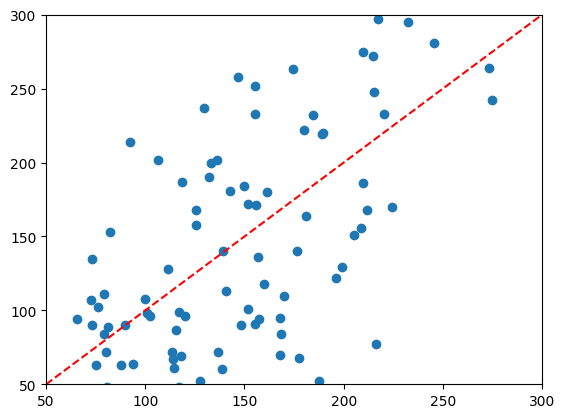

In [ ]:
y_pred = model.predict(x_test)
plt.scatter(y_pred[:,0], y_test)
plt.xlim(50, 300)
plt.ylim(50, 300)
plt.plot([50, 300], [50, 300], 'r--', label='y=x line')

## 2. 블록연결을 통한 커스텀 서칭스페이스

In [ ]:
# 입력 블록 생성
input_node = ak.StructuredDataInput()

# 블록 연결
processed_node = ak.StructuredDataBlock()(input_node)
latent_node = ak.DenseBlock(num_layers = 3,num_units=2)(processed_node)
output_node = ak.RegressionHead()(latent_node)

# AutoModel 초기화 및 훈련
auto_model = ak.AutoModel(inputs=input_node, outputs=output_node, overwrite=True, max_trials=3)
auto_model.fit(x_train, y_train, epochs=50)

Trial 3 Complete [00h 00m 06s]
val_loss: 28272.607421875

Best val_loss So Far: 26845.70703125
Total elapsed time: 00h 00m 41s
Epoch 1/100
12/12 [==============================] - 2s 4ms/step - loss: 29809.6680 - mean_squared_error: 29809.6680
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 29787.0879 - mean_squared_error: 29787.0879
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 29772.5332 - mean_squared_error: 29772.5332
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 29760.4609 - mean_squared_error: 29760.4609
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 29750.3203 - mean_squared_error: 29750.3203
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 29740.0449 - mean_squared_error: 29740.0449
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 29731.2441 - mean_squared_error: 29731.2441
Epoch 8/100
12/12 [==============================] - 0

In [ ]:
# 모델 평가
custom_model = auto_model.export_model()
custom_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 multi_category_encoding (M  (None, 10)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 10)                21        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

3/3 [==============================] - 0s 5ms/step


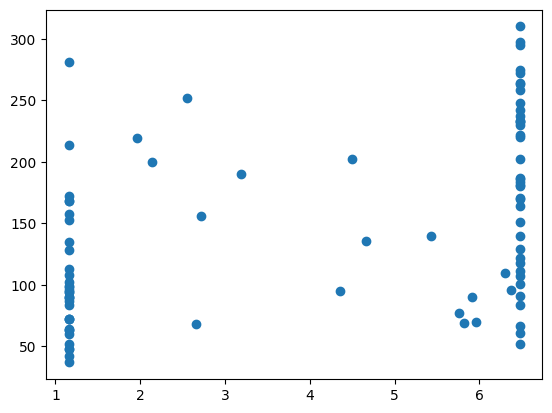

In [ ]:
y_pred = custom_model.predict(x_test)
plt.scatter(y_pred[:,0], y_test)
# plt.xlim(50, 300)
# plt.ylim(50, 300)
# plt.plot([50, 300], [50, 300], 'r--', label='y=x line')

# Classification 모델
지난 모델 개발에 활용했던 타이타닉 데이터에 대해서 오토케라스로 분류모델을 만들어보겠습니다.

In [ ]:
!wget https://raw.githubusercontent.com/shryu8902/KIRD_AUTOML/main/Titanic-Dataset.csv
titanic_data = pd.read_csv('./Titanic-Dataset.csv')

--2024-06-21 09:43:36--  https://raw.githubusercontent.com/shryu8902/KIRD_AUTOML/main/Titanic-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘Titanic-Dataset.csv’

Titanic-Dataset.csv 100%[===================>]  59.76K  --.-KB/s    in 0.07s   

2024-06-21 09:43:37 (847 KB/s) - ‘Titanic-Dataset.csv’ saved [61194/61194]



In [ ]:
from sklearn.preprocessing import LabelEncoder

titanic_data.drop(['PassengerId','Cabin','Name','Ticket','Embarked'],axis = 1, inplace=True)
titanic_data.Age.fillna(-1, inplace = True)
titanic_data['Sex'] = LabelEncoder().fit_transform(titanic_data['Sex'])  # 'sex' feature를 numerical로 변환

In [ ]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) # Stratified split 적용


In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
502,3,0,-1.0,0,0,7.6292
464,3,1,-1.0,0,0,8.0500
198,3,0,-1.0,0,0,7.7500
765,1,0,51.0,1,0,77.9583
421,3,1,21.0,0,0,7.7333
...,...,...,...,...,...,...
131,3,1,20.0,0,0,7.0500
490,3,1,-1.0,1,0,19.9667
528,3,1,39.0,0,0,7.9250
48,3,1,-1.0,2,0,21.6792


In [ ]:
# 정형데이터 모델에 대한 학습
# NAS 수행
reg = ak.StructuredDataClassifier(max_trials=10, tuner = 'bayesian',overwrite = True)

# 모델 훈련
reg.fit(X_train, y_train, epochs=5)

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.6634615659713745

Best val_accuracy So Far: 0.8269230723381042
Total elapsed time: 00h 00m 42s
Epoch 1/5
23/23 [==============================] - 2s 6ms/step - loss: 0.5776 - accuracy: 0.7486
Epoch 2/5
23/23 [==============================] - 0s 6ms/step - loss: 0.4580 - accuracy: 0.8146
Epoch 3/5
23/23 [==============================] - 0s 6ms/step - loss: 0.4306 - accuracy: 0.8202
Epoch 4/5
23/23 [==============================] - 0s 6ms/step - loss: 0.4131 - accuracy: 0.8329
Epoch 5/5
23/23 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8469


In [ ]:
model = reg.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 multi_category_encoding (M  (None, 6)                 0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 256)               1792      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                             

In [ ]:
# 최종 모델에대한 성능 평가
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.8045


[0.50755375623703, 0.8044692873954773]

In [ ]:
# 결정된 인공신경망 구조를 바탕으로 추가학습 수행
model.fit(X_train, y_train, epochs = 40)

Epoch 1/40
23/23 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8329
Epoch 2/40
23/23 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.8244
Epoch 3/40
23/23 [==============================] - 0s 3ms/step - loss: 0.3979 - accuracy: 0.8230
Epoch 4/40
23/23 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8132
Epoch 5/40
23/23 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.8188
Epoch 6/40
23/23 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8244
Epoch 7/40
23/23 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8315
Epoch 8/40
23/23 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8329
Epoch 9/40
23/23 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8244
Epoch 10/40
23/23 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.8230
Epoch 11/40
23/23 [

In [ ]:
# 추가학습 이후 성능 증가 확인가능
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7933


[0.4784148633480072, 0.7932960987091064]